CONTACT CENTER SIMULATION

In [8]:
from simulation import run_Simulation, plotHistogram
import random
import pandas as pd
import simpy
import numpy as np
import ipysheet
from ipysheet import sheet,cell,column,row,to_dataframe
import matplotlib.pyplot as plt


Create the parameters for the simulation:
- Arrivals: rate of calls arriving in contact center
- SIM_TIME: how long the simulation will run for
- svc_lvl_thresh: the threshold for calculating service level
- NUM_SIMS: the number of simulations run

In [10]:
# This creates the spreadsheet for user to enter the simulation parameters
sim_sheet = sheet(rows=1,columns=4,column_headers=['Arrivals','SIM_TIME','svc_lvl_thresh','NUM_SIMS'])
row(0,[1,600,30,100])
sim_sheet

Sheet(cells=(Cell(column_end=3, column_start=0, row_end=0, row_start=0, squeeze_column=False, type='numeric', …

In [12]:
# Run this cell to generate the parameter dataframe for the simulation
sim_params = to_dataframe(sim_sheet)
print(sim_params)

   Arrivals  SIM_TIME  svc_lvl_thresh  NUM_SIMS
0         1       600              30       100


Create the parameters for each tier:
- Tier: the label of each tier
- Talk_mu: 
- Wrap_mu: 
- Hold_mu: 
- Talk_std: 
- Wrap_std: 
- Hold_std: 
- Volume: 
- Patience: 
- Transfer: 
- Agents: 

In [4]:
# Code to generate ipysheet for tier params based on user input for number of tiers

# update num_tiers to the number of tiers in call center
num_tiers = 3

tier_sheet = sheet(rows=num_tiers,columns=11,column_headers=['Tier','Talk_mu','Wrap_mu','Hold_mu','Talk_std',\
    'Wrap_std','Hold_std','Volume','Patience','Transfer','Agents'])
i = 0
for i in range(num_tiers):
    row(i,[0,0,0,0,0,0,0,0,0,0,0])

tier_sheet

Sheet(cells=(Cell(column_end=10, column_start=0, row_end=0, row_start=0, squeeze_column=False, type='numeric',…

In [5]:
tier_params = to_dataframe(tier_sheet)
print(tier_params)

   Tier  Talk_mu  Wrap_mu  Hold_mu  Talk_std  Wrap_std  Hold_std  Volume  \
0     0        0        0        0         0         0         0       0   
1     0        0        0        0         0         0         0       0   
2     0        0        0        0         0         0         0       0   

   Patience  Transfer  Agents  
0         0         0       0  
1         0         0       0  
2         0         0       0  


In [6]:
"""
This is an example of tier parameters for 3 tiers (without using ipysheet entry)
Uncomment the lines below to generate the example tier_params values for the simulation.
"""

tier_params_dict = {'Tier':['T1','T2','T3'],'Talk_mu':[397,487,396],'Wrap_mu':[62,95,79],'Hold_mu':[83,97,87],'Talk_std':[60,79,90],\
    'Wrap_std':[20,40,47],'Hold_std':[20,34,52],'Volume':[0.7,0.97,1],'Patience':[320,480,240],'Transfer':[0.3,0.22,0.34],'Agents':[321,94,9]}
tier_params = pd.DataFrame(tier_params_dict)



In [13]:
results  = run_Simulation(sim_params,tier_params)

      Entered  Offered  Handled      Talk_Time      Ans_Time     Hold_Time  \
Tier                                                                         
T1     695.85   631.19   574.20  228029.961766  52975.467133  47693.834790   
T2     271.88   151.01   113.90   55448.410248   9380.678738  11002.933297   
T3      29.27    24.15    13.42    5274.437103    996.922248   1178.745818   

         Wrap_Time  Transfer  Abandon  Within_Svc_Lvl  Iteration  Abndn_pct  \
Tier                                                                          
T1    35624.794282    172.41    56.99          321.18       49.5   0.089889   
T2    10805.603248     25.04    37.11           94.66       49.5   0.243071   
T3     1080.821549      5.00    10.73            8.43       49.5   0.436068   

        Avg_Talk   Svc_Lvl        ASA  
Tier                                   
T1    397.144950  0.509197  92.260458  
T2    486.901549  0.629392  82.052637  
T3    394.581322  0.355071  73.300428  


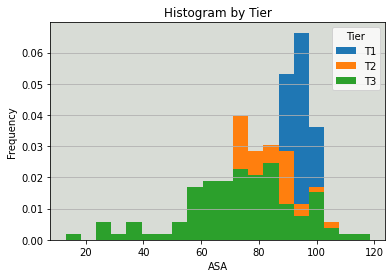

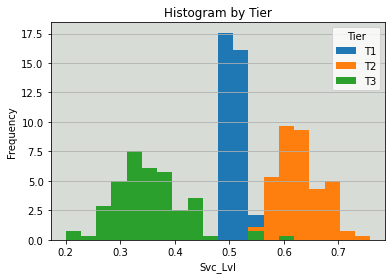

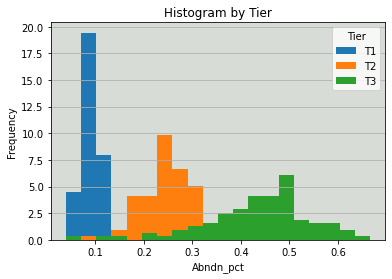

In [16]:
# code for presenting results

plotHistogram(results,'ASA')
plotHistogram(results,'Svc_Lvl')
plotHistogram(results,'Abndn_pct')

In [ ]:
# code for running multiple simulation scenarios